## Task

Your task is to use the Heart Disease UCI dataset to predict whether or not a patient has heart disease based on various medical attributes.

1. Data Preparation:

    - Download the “Heart Disease UCI” dataset.
    - Perform exploratory data analysis (EDA) to understand the dataset.
    - Preprocess the data: handle missing values if any, encode categorical variables, and scale the features.


2. Model Training:

    - Split the dataset into a training set and a testing set.
    - Train a logistic regression model on the training set.


3. Model Evaluation:

    - Evaluate the model on the testing set using accuracy, precision, recall, and F1 score.
    - Use a confusion matrix to visualize the model’s performance.




In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
sns.set_theme()

### Data Preparation

In [30]:
df = pd.read_csv("heart_disease_uci.csv")

In [31]:
df

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,916,54,Female,VA Long Beach,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,NaN,NaN,NaN,1
916,917,62,Male,VA Long Beach,typical angina,NaN,139.0,False,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN,0
917,918,55,Male,VA Long Beach,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,NaN,NaN,fixed defect,2
918,919,58,Male,VA Long Beach,asymptomatic,NaN,385.0,True,lv hypertrophy,NaN,NaN,NaN,NaN,NaN,NaN,0



    1. id (Unique id for each patient)
    2. age (Age of the patient in years)
    3. origin (place of study)
    4. sex (Male/Female)
    5. cp chest pain type ([typical angina, atypical angina, non-anginal, asymptomatic])
    6. trestbps resting blood pressure (resting blood pressure (in mm Hg on admission to the hospital))
    7. chol (serum cholesterol in mg/dl)
    8. fbs (if fasting blood sugar > 120 mg/dl)
    9. restecg (resting electrocardiographic results)
    -- Values: [normal, stt abnormality, lv hypertrophy]
    10. thalach: maximum heart rate achieved
    11. exang: exercise-induced angina (True/ False)
    12. oldpeak: ST depression induced by exercise relative to rest
    13. slope: the slope of the peak exercise ST segment
    14.ca: number of major vessels (0-3) colored by fluoroscopy
    15. thal: [normal; fixed defect; reversible defect]
    16. num: the predicted attribute


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [33]:
del df['ca']
del df['thal']
del df['slope']

In [34]:
for col in df.columns:
    df[col] = df[col].fillna(df[col].mode()[0])

In [36]:
categorical_cols = df.select_dtypes(include=['object']).columns

label_encoder = LabelEncoder()

for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])

In [37]:
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,num
0,1,63,1,0,3,145.0,233.0,True,0,150.0,False,2.3,0
1,2,67,1,0,0,160.0,286.0,False,0,108.0,True,1.5,2
2,3,67,1,0,0,120.0,229.0,False,0,129.0,True,2.6,1
3,4,37,1,0,2,130.0,250.0,False,1,187.0,False,3.5,0
4,5,41,0,0,1,130.0,204.0,False,0,172.0,False,1.4,0


In [48]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# Rename the target column: The column 'num' indicates presence of heart disease
# For binary classification, we transform it to 0 (no disease) and 1 (disease present)

df.rename(columns={'num': 'target'}, inplace=True)
df['target'] = df['target'].apply(lambda x: 1 if x > 0 else 0)
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,target
0,-1.730169,1.007386,1,0,3,0.730810,0.352523,1,0,0.462879,0,1.375873,0
1,-1.726404,1.432034,1,0,0,1.534154,0.815414,0,0,-1.197349,1,0.632376,1
2,-1.722639,1.432034,1,0,0,-0.608096,0.317588,0,0,-0.367235,1,1.654684,1
3,-1.718873,-1.752828,1,0,2,-0.072534,0.500997,0,1,1.925460,0,2.491118,0
4,-1.715108,-1.328180,0,0,1,-0.072534,0.099243,0,0,1.332522,0,0.539439,0


### Model Training

In [49]:
target = 'target'

x= df.drop(target, axis = 1)
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.70, test_size=0.30, random_state=42)

In [65]:
model = LogisticRegression(max_iter = 10000, C = 0.15)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(f"Accuracy Score: {np.round(accuracy_score(y_test, y_pred),2)}")

Accuracy Score: 0.81


### Model Evaluation

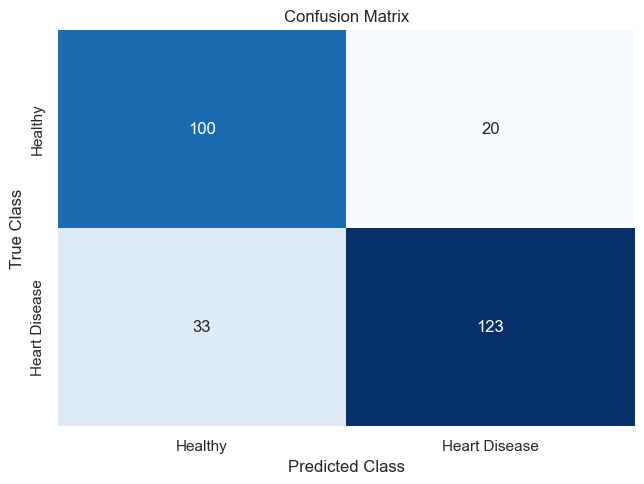

In [67]:
class_names = ['Healthy', 'Heart Disease']
matrix = confusion_matrix(y_test, y_pred)
# Create pandas dataframe
dataframe = pd.DataFrame(matrix, index=class_names, columns=class_names)
# Create heatmap
sns.heatmap(dataframe, annot=True, cbar=None, cmap="Blues", fmt = 'g')
plt.title("Confusion Matrix"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

In [69]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [70]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)


print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

Accuracy: 0.8080
Precision: 0.8601
Recall: 0.7885
F1 Score: 0.8227
